In [12]:
library('caret')
library('nnet')
library('parallel')

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
# Función de pliegue
rmse_fold <- function(pliegue, form, datos, nn_size){
    pliegue_logic <- seq_len(nrow(datos)) %in% pliegue
    prueba <- subset(datos, pliegue_logic)
    entrena <- subset(datos, !pliegue_logic)
    
    modelo <- nnet(form, data=entrena, size=nn_size, linout = TRUE, trace = FALSE )
    
    response_name <- setdiff(names(datos), modelo$coefnames)
    y_pronosticado <- predict(modelo, newdata = prueba)
    #Metrica de medición de la red neuronal
    rmse <-  RMSE(y_pronosticado, prueba[[response_name]])
    rmse
}

In [43]:
#data 
n_pliegues <- 7
sample_size <- 3000
neuronas <- 10

genera_y <- function(x){
    cos(x) + rnorm(length(x), 0, 0.5)
}
X <- seq(0,3*pi,length.out = sample_size)
y <- genera_y(X)
data.frame(X,y) -> muestra

### Cross validation

In [44]:
# Crar los pliegues
createFolds(muestra$y, k= n_pliegues) -> pliegues #ME da el numero de la fila que va a estar en el pliegue

In [45]:
mclapply (
     pliegues, #Las iteraciones
     rmse_fold, #Funcion 
     y ~ X , #Formula
     muestra, #datos
     nn_size = neuronas,# Cantidad de neuronas
    mc.cores = 6
) -> rmse_pligues

In [46]:
# Convertit en vector
rmse_pligues <- unlist(rmse_pligues)

In [47]:
mean(rmse_pligues)

[1] 0.5111186

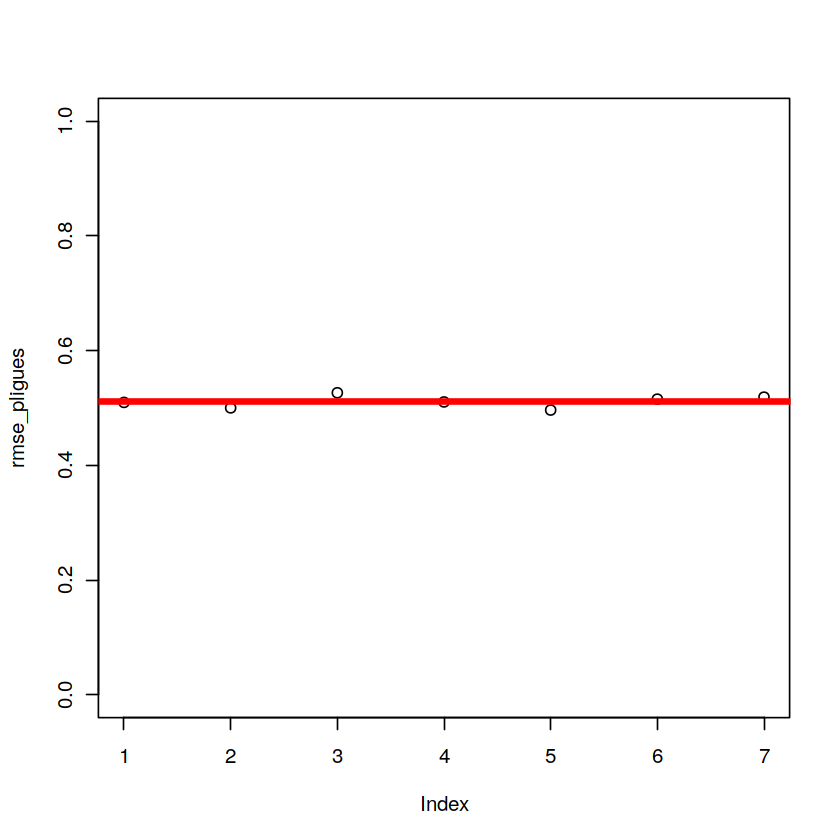

In [48]:
plot(rmse_pligues, ylim= c(0,1))
abline(h = mean(rmse_pligues), col= 2, lwd = 4)